In [1]:
from data import mnist
a,b = mnist()

/home/adop/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [19]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
#import helper

path = '/home/adop/mlops/dtu_mlops/data/corruptmnist/'
train_images_list, train_labels_list = [], []

for i in range(0,6):
    train_images_path = path + f'train_images_{i}.pt'
    train_labels_path = path + f'train_target_{i}.pt'
    
    train_images = torch.load(train_images_path)
    train_labels = torch.load(train_labels_path)
    
    train_images_list.append(train_images)
    train_labels_list.append(train_labels)

train_images = torch.cat(train_images_list, dim=0)
train_labels = torch.cat(train_labels_list, dim=0)
test_images = torch.load(path+f'test_images.pt')
test_labels = torch.load(path+f'test_target.pt')
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

batch_size = 64
train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

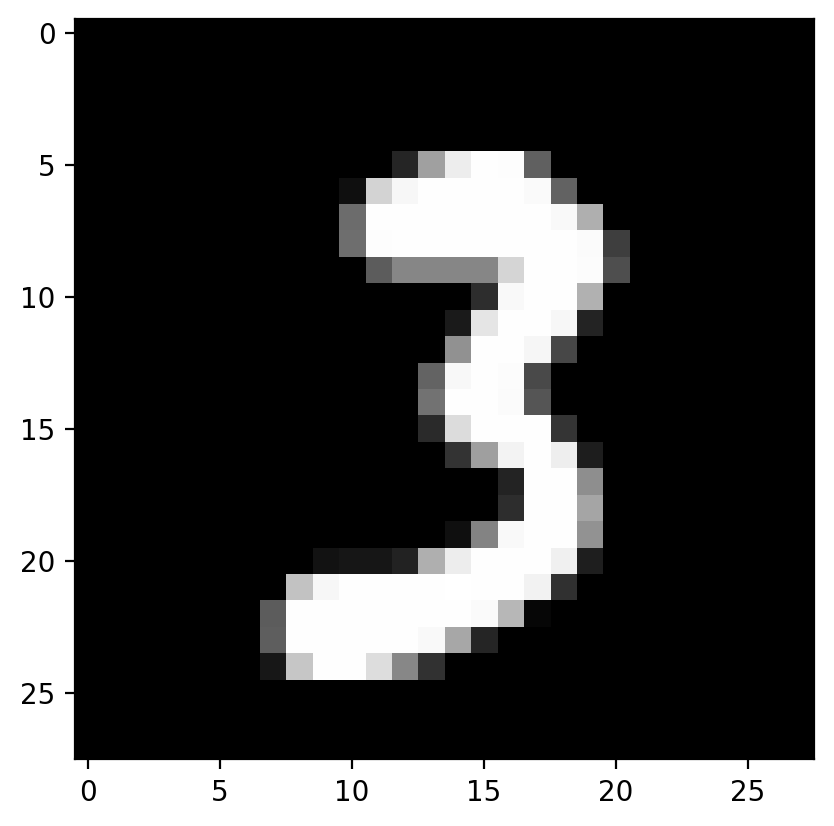

In [22]:
images, labels = next(iter(train))
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');

In [ ]:
from torch import nn
import torch.nn.functional as F

class MyAwesomeModel(nn.Module):
    """My awesome model."""

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()

    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.relu(x)

        return x

In [7]:
from torch import nn
import torch.nn.functional as F

class MyAwesomeModel(nn.Module):
    """My awesome model."""

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self,x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        #No dropout for output 
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

In [10]:
import click
import torch
from model import MyAwesomeModel
from data import mnist
from torch import optim
from torch import nn

In [11]:
model = MyAwesomeModel()
train_set, _ = mnist()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in train_set:
        optimizer.zero_grad()
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        output = model(images)
        # TODO: Training pass
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(train_set)}")

Training loss: 2.2984139888779693
Training loss: 2.2803035946543027
Training loss: 2.2495477265640615
Training loss: 2.193915344758837
Training loss: 2.09501454418402
Training loss: 1.9492906354891975
Training loss: 1.7831406359479371
Training loss: 1.622118558202471
Training loss: 1.4771634985897333
Training loss: 1.3550000183109536
